In [1]:
import graspy
import seaborn as sns
import numpy as np
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from graspy.embed import AdjacencySpectralEmbed


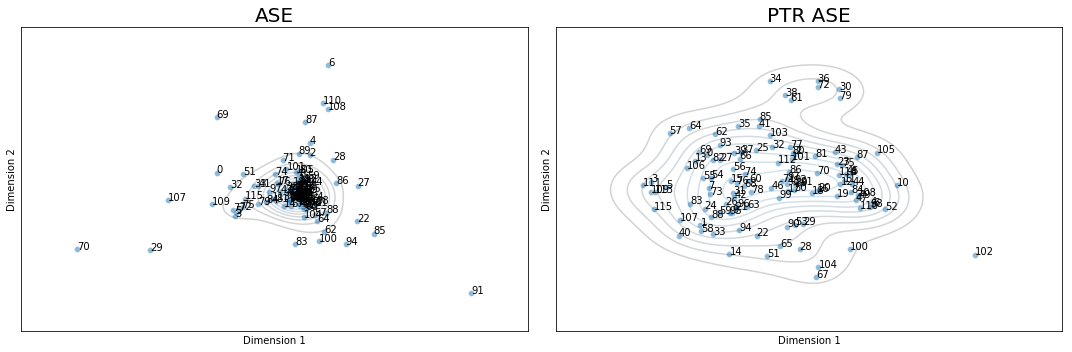

sub-NDARAA536PTU_acq-64dir_dwi_aal_res-1x1x1_measure-spatial-ds.edgelist


In [14]:
path = 'C:\\Users\\Owner\\JHU\\gs\\data\\outputs_dmri\\dwi\\roi-connectomes\\aal_res-1x1x1'
edgelists = os.listdir(path)

to_plot = True
is_text = True
fontsize = 20

dists = np.zeros((116, 298))

dists = []

for i, file in enumerate(edgelists[0:1]):#150]):
    
    # import graph
    G = nx.read_weighted_edgelist('{}\\{}'.format(path,file))
    
    # vanilla ASE
    ase = AdjacencySpectralEmbed(k=10)
    ase.fit(G)
    embed = ase.fit_transform(G)
    
    # PTR before doing ASE
    G_ptr = graspy.utils.pass_to_ranks(G)
    ase_ptr = AdjacencySpectralEmbed(k=10)
    ase_ptr.fit(G_ptr)
    embed_ptr = ase_ptr.fit_transform(G_ptr)
    
    # Making labels and putting in DF for plotting
    col_names =  ['Dimension {}'.format(i + 1) for i in range(0, embed_ptr.shape[1])]
    embed_ptr_df = pd.DataFrame(embed_ptr, columns=col_names)
    embed_ptr_df['method'] = 'ASE PTR'
    embed_df = pd.DataFrame(embed, columns=col_names)
    embed_df['method'] = 'ASE'
    node_labels = list(range(0,len(embed_ptr)))
    frames = [embed_ptr_df, embed_df]
    embeds = pd.concat(frames)
    
    # Plotting
    if to_plot:
        fig, ax = plt.subplots(ncols=2, figsize=(15,5), )

        p = sns.scatterplot(x='Dimension 1', y='Dimension 2', ax=ax[0],data=embed_df, alpha=0.5)
        p2 = sns.kdeplot(embed_df['Dimension 1'], embed_df['Dimension 2'], ax=ax[0], alpha=0.2,)
        #p2 = sns.jointplot(x='Dimension 1', y='Dimension 2', ax=ax[1],data=embed_df, kind='kde')
        p.set(xticklabels=[], yticklabels=[], yticks=[], xticks=[])
        if is_text:
            for i, txt in enumerate(node_labels):
                ax[0].annotate(txt, (embed_df['Dimension 1'][i],embed_df['Dimension 2'][i]))
        ax[0].set_title('ASE', fontsize=fontsize)
        
        p = sns.scatterplot(x='Dimension 1', y='Dimension 2', ax=ax[1],data=embed_ptr_df, alpha=0.5)
        p2 = sns.kdeplot(embed_ptr_df['Dimension 1'], embed_ptr_df['Dimension 2'], ax=ax[1], alpha=0.2,)
        p.set(xticklabels=[], yticklabels=[], yticks=[], xticks=[])
        if is_text:
            for i, txt in enumerate(node_labels):
                ax[1].annotate(txt, (embed_ptr_df['Dimension 1'][i],embed_ptr_df['Dimension 2'][i] ))
        ax[1].set_title('PTR ASE', fontsize=fontsize)
        

        fig.tight_layout()
        plt.show()
        print(file)
    # Find the Euclidian distance from the cluster mean 
    kmean = KMeans(n_clusters=1).fit(embed) # overkill but fast and it's clean ¯\_(ツ)_/¯
    centroid = kmean.cluster_centers_[0]
    dist = np.linalg.norm(embed - centroid, axis=1)
    
    if dist.shape[0] == 116:
        dists.append(dist)
    

In [67]:
dists = np.array(dists)
dists = dists.transpose()

In [68]:
mean_dists = np.mean(dists, axis=1)
print(np.where(mean_dists > 100))

(array([  0,  29,  32,  39,  51,  69,  70,  81,  83,  87,  88,  91,  92,
        94, 107], dtype=int64),)


# AAL atlas regions that diverge from ASE centroid 


29 : Insula_L

32 : Cingulum_Ant_R

39 : ParaHippocampal_L

51 : Occipital_Mid_L

69 : Paracentral_Lobule_L

70 : Paracentral_Lobule_R

81 : Temporal_Sup_L

83 : Temporal_Pole_Sup_L

87 : Temporal_Pole_Mid_L

88 : Temporal_Pole_Mid_R

91 : Cerebelum_Crus1_L

92 : Cerebelum_Crus1_R

94 : Cerebelum_Crus2_R

107 : Cerebelum_10_L
